In [1]:
# change directory to the root of the project (assuming that the notebook is in the draft folder)
import os
os.chdir("..")
print("Current working directory: %s" % os.getcwd())

Current working directory: c:\Users\bcynuaa\Desktop\LocalProject\Help\CFDPostFlutterHelp\CODE\CLShakeAoA


In [2]:
from src.classes.AoAFinder import AoAFinder
mesh_filename: str = "C://Project//Mesh//cfl3d1.x"
Minf: float = 0.72
dt: float = -0.2
aoa_finder: AoAFinder = AoAFinder(mesh_filename, Minf)

config: CalculationSettings.py is imported.
config: InpFileSettings.py is imported.
config: Cfl3d.py is imported.
config: Meshes.py is imported.
utils: Path is imported.
utils: RunExe is imported.
classes: CalculationTask imported
classes: AoAFinder.py is imported.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
AoA_array: np.ndarray = np.linspace(0.5, 2.0, 4)
AoA_array = np.hstack([AoA_array, np.linspace(2.1, 2.55, 10)])
AoA_array = np.hstack([AoA_array, np.linspace(2.6, 3.1, 26)])
AoA_array

array([0.5 , 1.  , 1.5 , 2.  , 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 ,
       2.45, 2.5 , 2.55, 2.6 , 2.62, 2.64, 2.66, 2.68, 2.7 , 2.72, 2.74,
       2.76, 2.78, 2.8 , 2.82, 2.84, 2.86, 2.88, 2.9 , 2.92, 2.94, 2.96,
       2.98, 3.  , 3.02, 3.04, 3.06, 3.08, 3.1 ])

In [5]:
for AoA in AoA_array:
    aoa_finder.runTask(AoA, dt)
    pass

Task folder created: D:\Project\Data\001_t010\M_0.720\A_0.500
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 0.500000, dt: -0.200000
Files copied from exe path to task folder: D:\Project\Data\001_t010\M_0.720\A_0.500
Calculation task finished
Results readed
Task folder created: D:\Project\Data\001_t010\M_0.720\A_1.000
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 1.000000, dt: -0.200000
Files copied from exe path to task folder: D:\Project\Data\001_t010\M_0.720\A_1.000
Calculation task finished
Results readed
Task folder created: D:\Project\Data\001_t010\M_0.720\A_1.500
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 1.500000, dt: -0.200000
Files copied from exe path to task folder: D:\Project\Data\001_t010\M_0.720\A_1.5

In [6]:
df = aoa_finder.dataframe.copy()

In [7]:
df = aoa_finder.dataframe.copy()
df = df.sort_values(by=["AoA"])

In [8]:
df[["AoA", "CL", "converge", "dudy min"]]

,AoA,CL,converge,dudy min
0,0.50,0.677888,True,65951.95828167339
1,1.00,0.777508,True,73102.98139346729
2,1.50,0.884594,True,86948.05889688394
3,2.00,1.001967,True,81088.62359393851
4,2.10,1.027272,True,78155.93942822874
5,2.15,1.040096,True,77765.36585343152
6,2.20,1.052521,True,77859.34704722116
7,2.25,1.065262,True,77727.44675086495
8,2.30,1.077643,True,76643.7683797178
9,2.35,1.090430,True,75838.22036509101


In [9]:
# "converge" is True
df_ = df[df["converge"] == "True"]
df_[["AoA", "CL", "converge", "dudy min"]]

,AoA,CL,converge,dudy min
0,0.50,0.677888,True,65951.95828167339
1,1.00,0.777508,True,73102.98139346729
2,1.50,0.884594,True,86948.05889688394
3,2.00,1.001967,True,81088.62359393851
4,2.10,1.027272,True,78155.93942822874
5,2.15,1.040096,True,77765.36585343152
6,2.20,1.052521,True,77859.34704722116
7,2.25,1.065262,True,77727.44675086495
8,2.30,1.077643,True,76643.7683797178
9,2.35,1.090430,True,75838.22036509101


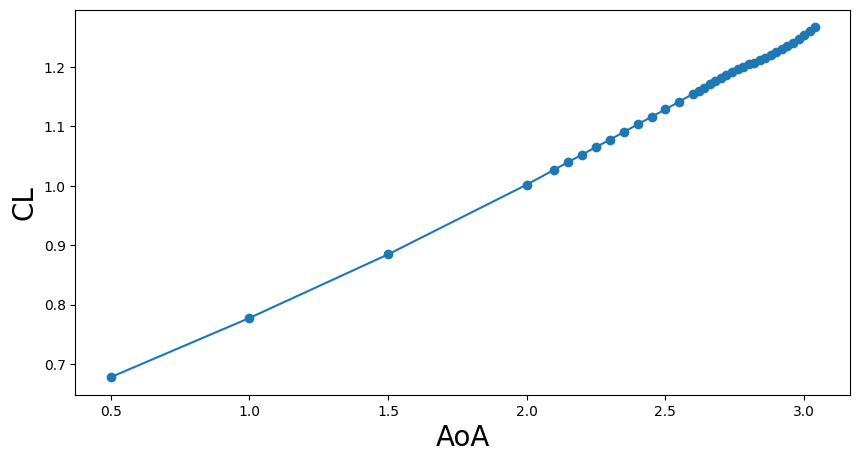

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df_["AoA"], df_["CL"], 'o-')
plt.xlabel("AoA", fontsize=20)
plt.ylabel("CL", fontsize=20)
plt.show()

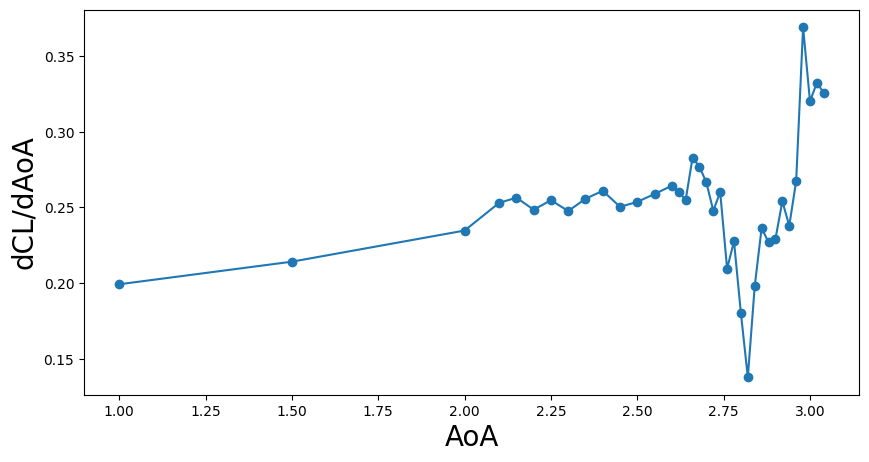

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df_["AoA"], df_["CL"].diff()/df_["AoA"].diff(), 'o-')
plt.xlabel("AoA", fontsize=20)
plt.ylabel("dCL/dAoA", fontsize=20)
plt.show()

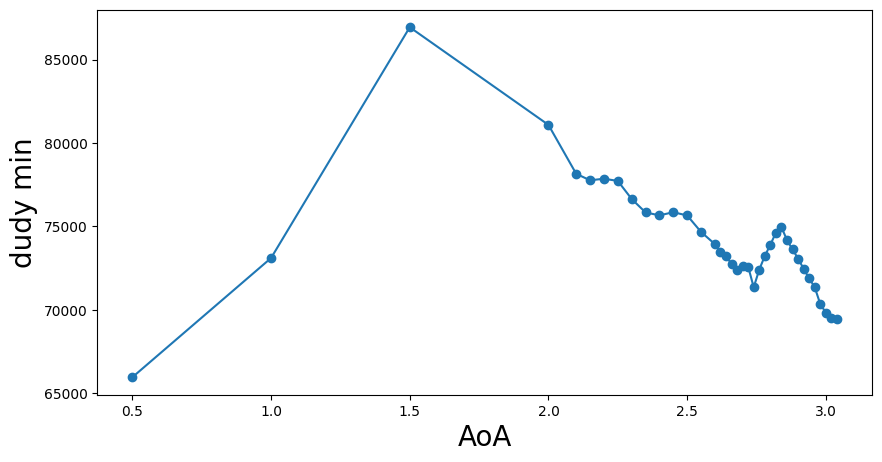

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df_["AoA"], df_["dudy min"], 'o-')
plt.xlabel("AoA", fontsize=20)
plt.ylabel("dudy min", fontsize=20)
plt.show()